In [1]:
import os
search_path = 'C:\\Users\\Acer\\Desktop\\CVPR\\train'   
root, dirs, files = next(os.walk(search_path), ([],[],[]))
print(dirs)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [2]:
import cv2
import os
import numpy as np

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
train_images = []
train_labels = []

for x in dirs:
    img_path = 'train\\'+str(x)
    img = load_images_from_folder(img_path)
#     train_images.append(img)
    for i in range(100):
        train_labels.append(x)
        train_images.append(img[i])
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [6]:
test_images = []
test_labels = []

for x in dirs:
    img_path = 'test\\'+str(x)
    img = load_images_from_folder(img_path)
#     train_images.append(img)
    for i in range(100):
        test_labels.append(x)
        test_images.append(img[i])
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [7]:
l = len(test_images)

In [8]:
def KNN_Predictor(test_image):
    cnt = {}
    max_cnt = -1
    res = ""
    for x in dirs:
        cnt.update({x:0})
    for k in range(20):
        lis = []
        co = 0
        for j in range(l):
            dist = np.linalg.norm(test_images[i]-train_images[j])
            lis.append([dist, train_labels[co]])
            co += 1
        lis.sort()
        mv = -1
        val = ""
        mp = {}
        for x in dirs:
            mp.update({x:0})
        for j in range(1, k):
            mp[lis[j][1]] += 1
            if mp[ lis[j][1] ] > mv:
                mv = mp[ lis[j][1] ]
                val = str(lis[j][1])  
        if val in cnt.keys():
            cnt[val] += 1
        else:
            cnt.update({val:0})
    for key in cnt:
        if cnt[key] > max_cnt:
            max_cnt = cnt[key]
            res = key;
    return res

In [11]:
tot = 0
corr = 0

for i in range(0,1000,100):
    for j in range(i,i+50):
        tot += 1
        if test_labels[j] ==  KNN_Predictor(test_images[j]):
            corr += 1
#     print("Original:", test_labels[j], " Predicted:", KNN_Predictor(test_images[i]))
print("%s/%s correct" % (corr, tot))
print("Accuracy: %s" % (corr/tot))

150/500 correct
Accuracy: 0.3


In [13]:
import matplotlib.pyplot as plt

def acc_plot():
    X = []
    Y = []
    for k in range(20):
        cnt = 0
        for i in range(l):
            lis = []
            co = 0
            for j in range(l):
                dist = np.linalg.norm(test_images[i]-train_images[j])
                lis.append([dist, train_labels[co]])
                co += 1
            lis.sort()
            mv = -1
            val = ""
            mp = {}
            for x in dirs:
                mp.update({x:0})
            for j in range(1, k):
                mp[lis[j][1]] += 1
                if mp[ lis[j][1] ] > mv:
                    mv = mp[ lis[j][1] ]
                    val = lis[j][1]

            if val == test_labels[i]:
                cnt += 1
        X.append(k)
        Y.append( (cnt*100) / l)
#     plt.plot(X, Y, 'b')
    plt.plot(X, Y, color='blue', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
    plt.title('Accuracy vs K')
    plt.xlabel('K')
    plt.ylabel('Accuracy in %')
    plt.show()

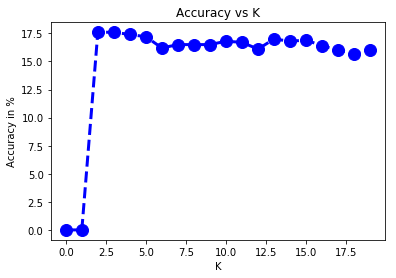

In [14]:
acc_plot()